# Lasso, Lasso-LARS, and Elastic Net paths
“`path`”展示了如何计算正则化参数$\alpha$ 和 特征系数。 
- Lasso and ElasticNet use coordinate descent method to compute
- Lasso-LARS use lars to compute the $\alpha$

The paths are `lasso_path`, `lars_path`, `enet_path`

Each plot shows how the model **coef. vary** as the regularization strength changes, offering insight into the behavior of these models under different constraints.


In [2]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import enet_path,lars_path,lasso_path
X,y = load_diabetes(return_X_y=True)

In [3]:
X /= X.std(axis=0) 

In [4]:
print(X.shape, y.shape)

(442, 10) (442,)


In [5]:

# Compute paths

eps = 5e-3  # 控制alpha范围， min_alpha = eps * max_alpha

print("Computing regularization path using the lasso...")
# alphas值，对应系数矩阵
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True# 限制回归系数是正数
)

print("Computing regularization path using the LARS...")
alphas_lars, _, coefs_lars = lars_path(X, y, method="lasso")

print("Computing regularization path using the positive LARS...")
alphas_positive_lars, _, coefs_positive_lars = lars_path(
    X, y, method="lasso", positive=True
)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the LARS...
Computing regularization path using the positive LARS...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


In [6]:
print(alphas_lasso.shape, coefs_lasso.shape) # coefs_lasso每行为 一个特征系数随着alpha的变化

(100,) (10, 100)


**1. 绘制lasso alpha 下 系数**

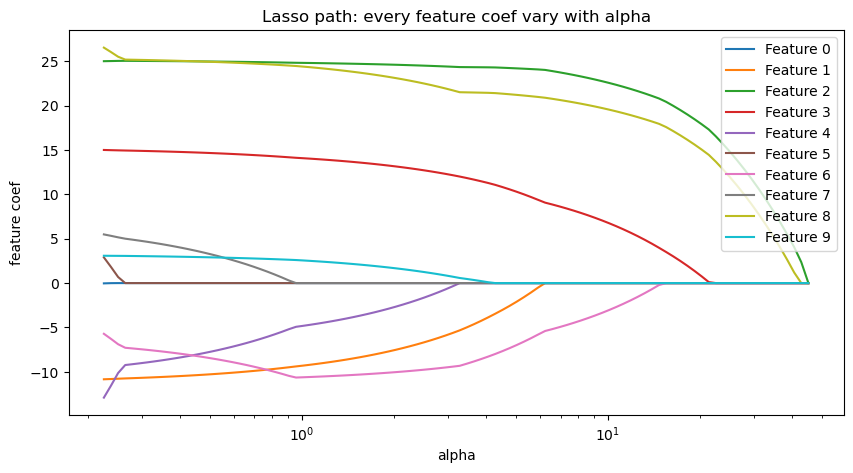

In [7]:
plt.figure(figsize=(10,5))
for i, coef in enumerate(coefs_lasso):
    plt.semilogx(alphas_lasso, coef, label=f"Feature {i}") # 绘制每个系数随ALpha变化曲线，添加标签
plt.xlabel('alpha')
plt.ylabel('feature coef')
plt.title('Lasso path: every feature coef vary with alpha')
plt.legend()

📈可以看到，随着alpha增加，特征系数大量坍塌

**2. 绘制不同路径对比曲线**

(np.float64(0.21656224230717747),
 np.float64(73.57253745367044),
 np.float64(-11.856664579140913),
 np.float64(28.07071532111527))

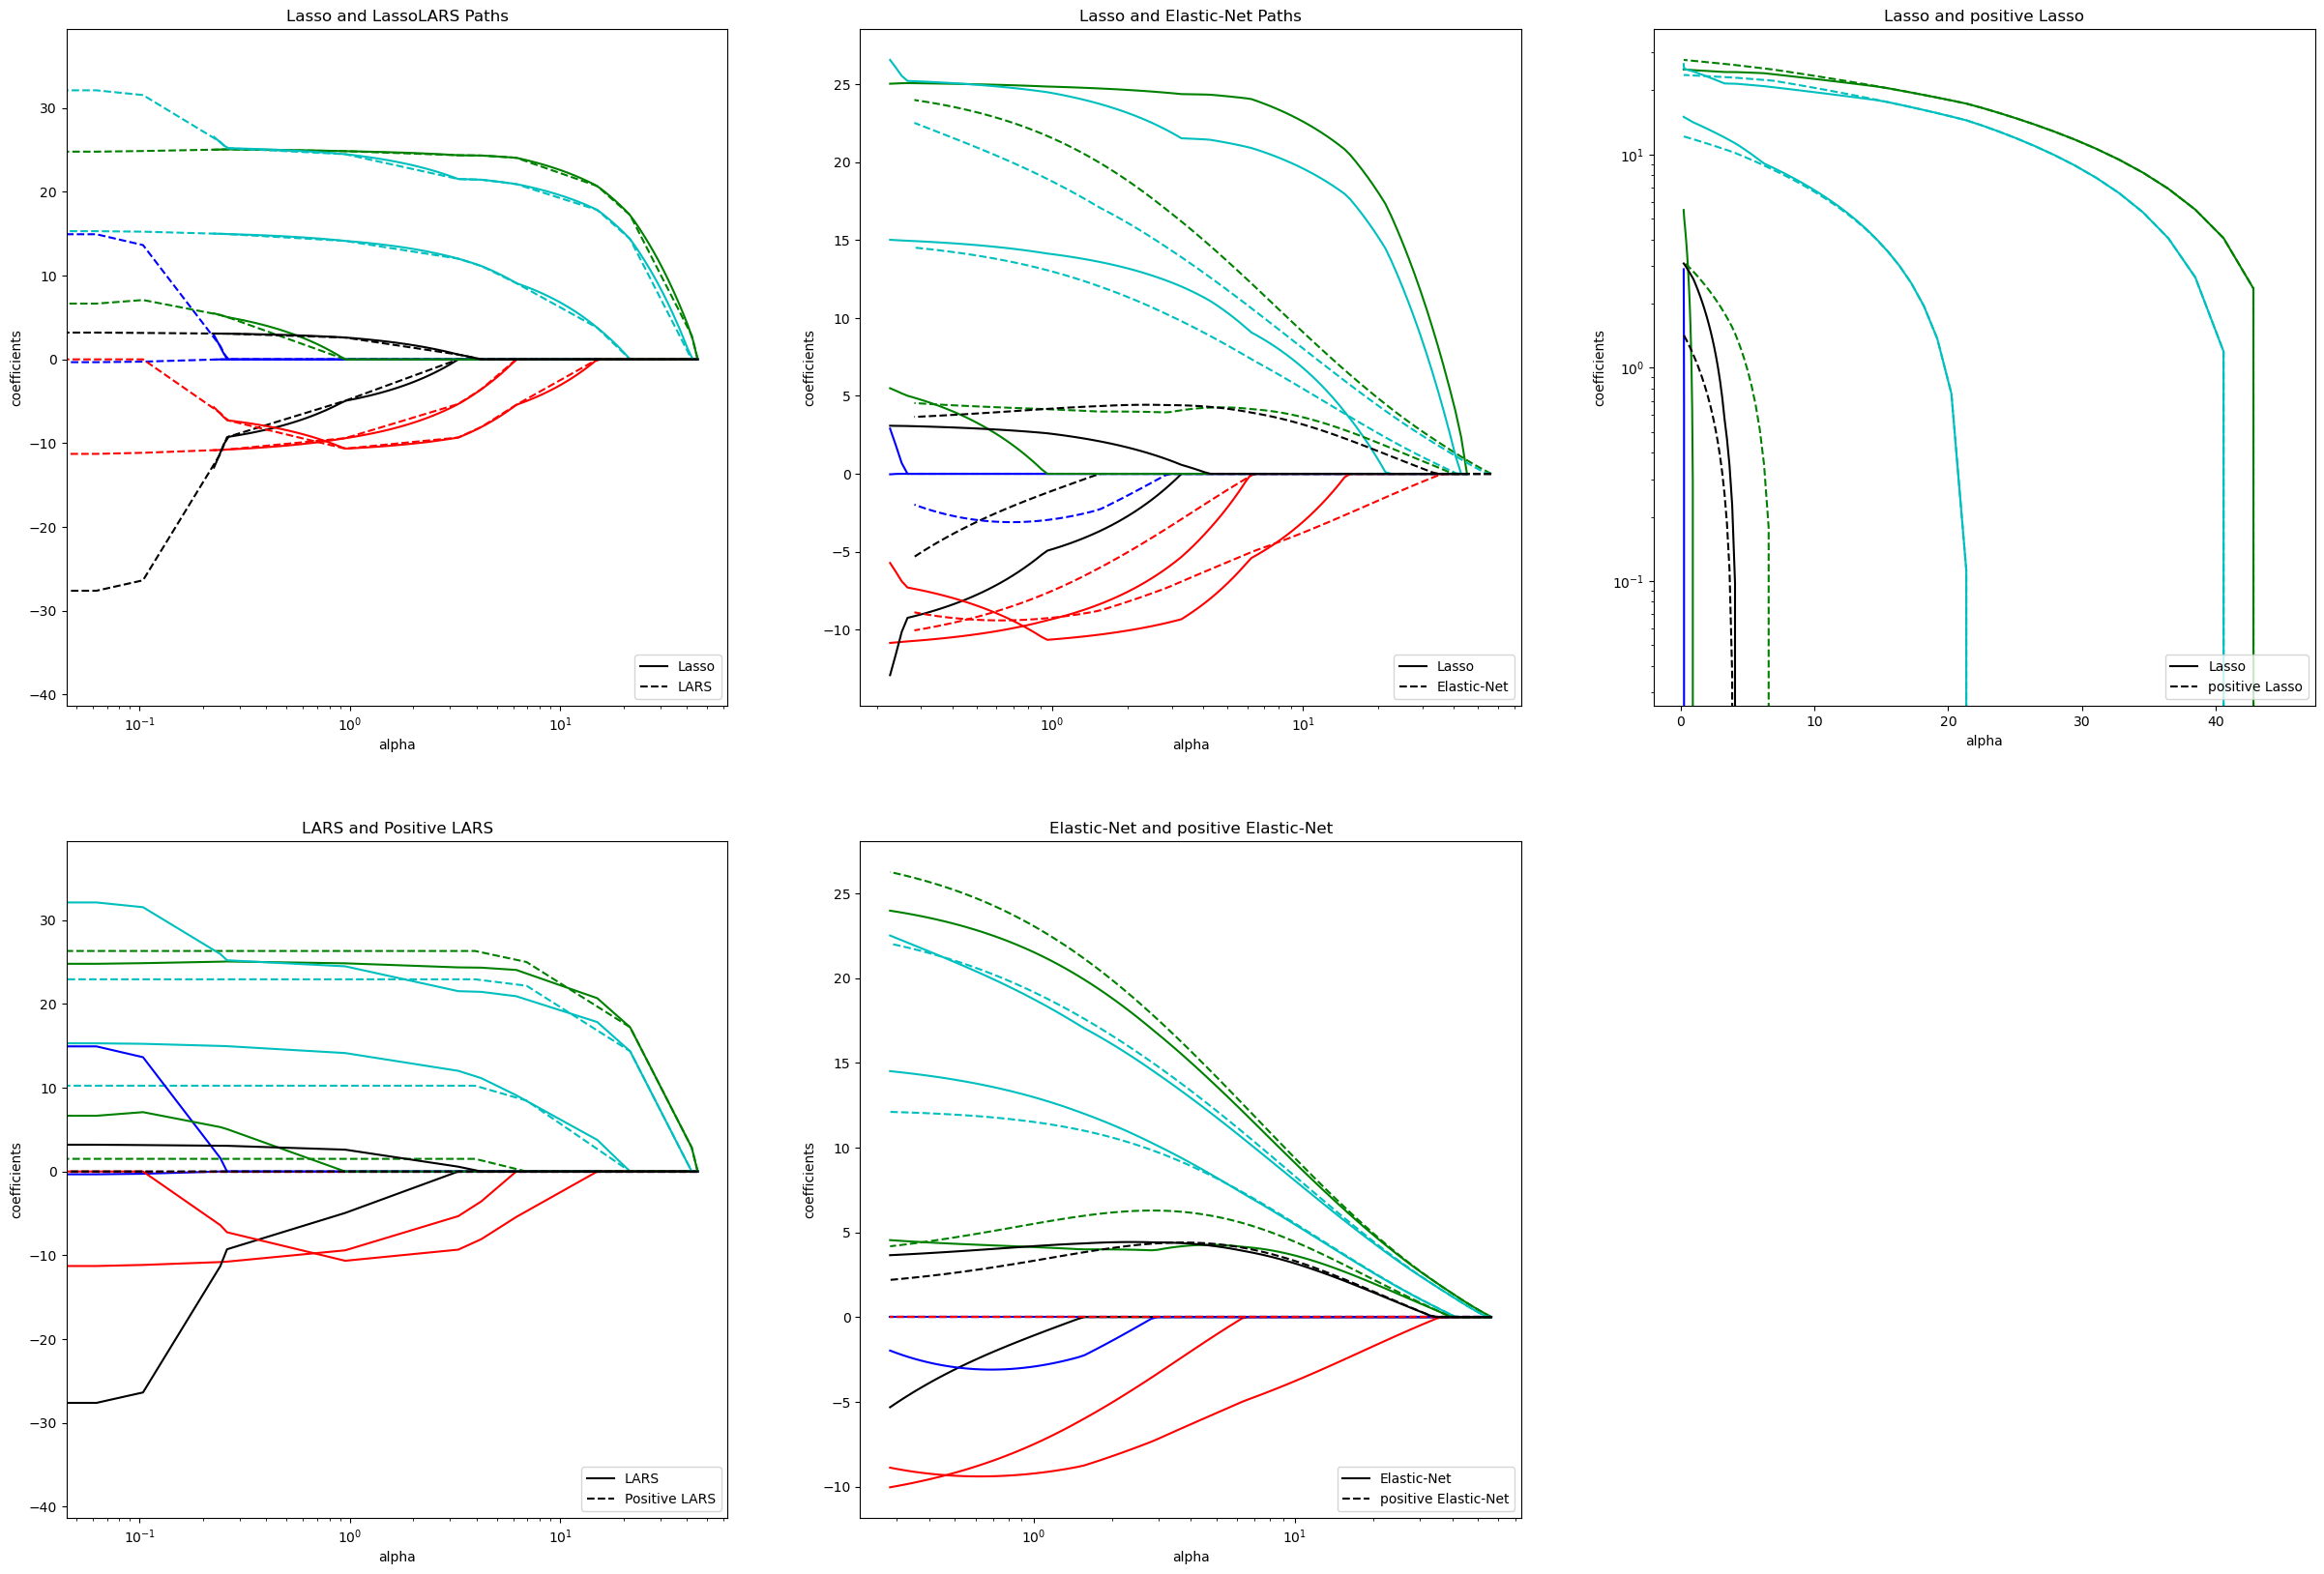

In [8]:
plt.figure(figsize=(30,20))

plt.subplot(2,3, 1)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_lasso, coef_lars, c in zip(coefs_lasso, coefs_lars, colors):
    l1 = plt.semilogx(alphas_lasso, coef_lasso, c=c)
    l2 = plt.semilogx(alphas_lars, coef_lars, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and LassoLARS Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "LARS"), loc="lower right")
plt.axis("tight")

plt.subplot(2,3, 2)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.semilogx(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogx(alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower right")
plt.axis("tight")


plt.subplot(2,3, 3)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.semilogy(alphas_lasso, coef_l, c=c)
    l2 = plt.semilogy(alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower right")
plt.axis("tight")


plt.subplot(2,3, 4)
colors = cycle(["b", "r", "g", "c", "k"])
for coef_lars, coef_positive_lars, c in zip(coefs_lars, coefs_positive_lars, colors):
    l1 = plt.semilogx(alphas_lars, coef_lars, c=c)
    l2 = plt.semilogx(alphas_positive_lars, coef_positive_lars, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("LARS and Positive LARS")
plt.legend((l1[-1], l2[-1]), ("LARS", "Positive LARS"), loc="lower right")
plt.axis("tight")

plt.subplot(2,3, 5)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.semilogx(alphas_enet, coef_e, c=c)
    l2 = plt.semilogx(alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower right")
plt.axis("tight")
